### 猫狗分类
---
**data**: 一共选择了4000张图片，比例为8:1:1，两个类的数量一样  
  
**模型训练**：

3. VGG16  
 3.1. train vgg16 from scratch(数据增强)    
    3.1.1 train 100 epochs  
 3.2. pre_trained model+FC_256+FC_1  
___

#### 3.1 train Vgg16 from scratch

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights=None,
                  include_top=False,
                  input_shape=(150, 150, 3))

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4097      
Total params: 65,058,625
Trainable params: 65,058,625
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


checkpoint=ModelCheckpoint('./models/vgg16_3.1.hdf5',monitor='val_acc',save_best_only=True,verbose=1)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20,callbacks=[checkpoint])


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30
160/160 [==============================] - 29s 179ms/step - loss: 0.6940 - acc: 0.4819 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to ./models/vgg16_3.1.hdf5
Epoch 2/30
160/160 [==============================] - 25s 158ms/step - loss: 0.6934 - acc: 0.4819 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/30
160/160 [==============================] - 26s 164ms/step - loss: 0.6932 - acc: 0.4841 - val_loss: 0.6932 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/30
160/160 [==============================] - 25s 157ms/step - loss: 0.6933 - acc: 0.4909 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/30
160/160 [==============================] - 25s 159ms/step - loss: 0.7065 - acc: 0.5281 - val_loss: 0.6907 - val_acc: 0.5

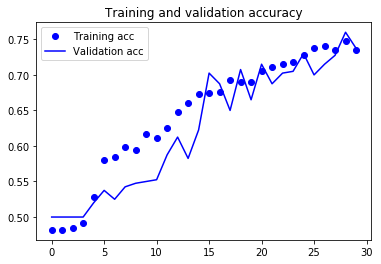

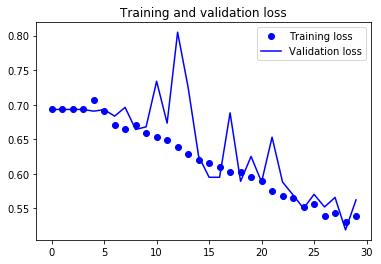

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

图3.1   
与图2.1相比较，在训练到30个epochs并没有出现过拟合现象

#### 3.1.1 100epoches

In [4]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


checkpoint=ModelCheckpoint('./models/vgg16_3.1_100epoches.hdf5',monitor='val_acc',save_best_only=True,verbose=1)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20,callbacks=[checkpoint])


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/100
160/160 [==============================] - 31s 194ms/step - loss: 0.6938 - acc: 0.4906 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to ./models/vgg16_3.1_100epoches.hdf5
Epoch 2/100
160/160 [==============================] - 26s 161ms/step - loss: 0.7189 - acc: 0.5128 - val_loss: 0.6798 - val_acc: 0.5625

Epoch 00002: val_acc improved from 0.50000 to 0.56250, saving model to ./models/vgg16_3.1_100epoches.hdf5
Epoch 3/100
160/160 [==============================] - 26s 162ms/step - loss: 0.6855 - acc: 0.5831 - val_loss: 0.6712 - val_acc: 0.5675

Epoch 00003: val_acc improved from 0.56250 to 0.56750, saving model to ./models/vgg16_3.1_100epoches.hdf5
Epoch 4/100
160/160 [==============================] - 26s 165ms/step - loss: 0.6787 - acc: 0.5862 - val_loss: 0.6599 - val_acc: 0.5650

Epoch 00004: val_acc did not improve from 0.56750
Epoc

160/160 [==============================] - 25s 157ms/step - loss: 0.4632 - acc: 0.7950 - val_loss: 0.4893 - val_acc: 0.7900

Epoch 00039: val_acc did not improve from 0.79500
Epoch 40/100
160/160 [==============================] - 25s 156ms/step - loss: 0.4557 - acc: 0.8016 - val_loss: 0.6364 - val_acc: 0.7675

Epoch 00040: val_acc did not improve from 0.79500
Epoch 41/100
160/160 [==============================] - 25s 156ms/step - loss: 0.4613 - acc: 0.8000 - val_loss: 0.5248 - val_acc: 0.7600

Epoch 00041: val_acc did not improve from 0.79500
Epoch 42/100
160/160 [==============================] - 25s 157ms/step - loss: 0.4732 - acc: 0.7981 - val_loss: 0.5047 - val_acc: 0.7700

Epoch 00042: val_acc did not improve from 0.79500
Epoch 43/100
160/160 [==============================] - 25s 156ms/step - loss: 0.4513 - acc: 0.7997 - val_loss: 0.5667 - val_acc: 0.7850

Epoch 00043: val_acc did not improve from 0.79500
Epoch 44/100
160/160 [==============================] - 25s 157ms/step - 

160/160 [==============================] - 26s 161ms/step - loss: 0.8737 - acc: 0.7653 - val_loss: 0.5848 - val_acc: 0.6325

Epoch 00081: val_acc did not improve from 0.83250
Epoch 82/100
160/160 [==============================] - 25s 156ms/step - loss: 0.4897 - acc: 0.7919 - val_loss: 0.6447 - val_acc: 0.8125

Epoch 00082: val_acc did not improve from 0.83250
Epoch 83/100
160/160 [==============================] - 25s 156ms/step - loss: 0.6357 - acc: 0.8041 - val_loss: 0.5491 - val_acc: 0.7650

Epoch 00083: val_acc did not improve from 0.83250
Epoch 84/100
160/160 [==============================] - 25s 156ms/step - loss: 1.4568 - acc: 0.7566 - val_loss: 1.0479 - val_acc: 0.7600

Epoch 00084: val_acc did not improve from 0.83250
Epoch 85/100
160/160 [==============================] - 25s 157ms/step - loss: 0.6050 - acc: 0.7869 - val_loss: 1.1420 - val_acc: 0.7300

Epoch 00085: val_acc did not improve from 0.83250
Epoch 86/100
160/160 [==============================] - 25s 156ms/step - 

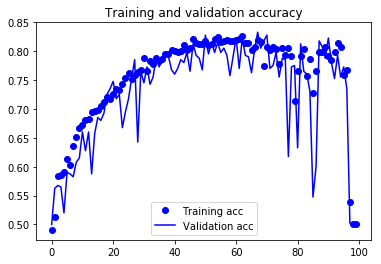

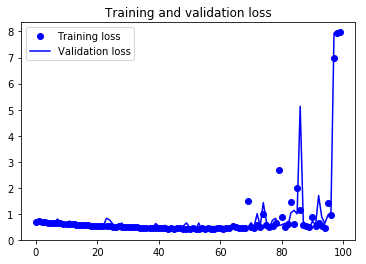

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

训练大概60个epochs后，性能开始变差

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory('./cats_and_dogs_small/test',target_size=(150,150))
model.load_weights('./models/vgg16_3.1_100epoches.hdf5')
# model.evaluate_generator(test_generator,steps=20)

Found 400 images belonging to 2 classes.


#### 3.2 pre_trained model+FC_256+FC_1

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
conv_base.trainable=False

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20)


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/100
160/160 [==============================] - 31s 197ms/step - loss: 0.4908 - acc: 0.7575 - val_loss: 0.3313 - val_acc: 0.8400
Epoch 2/100
160/160 [==============================] - 26s 165ms/step - loss: 0.3917 - acc: 0.8184 - val_loss: 0.2676 - val_acc: 0.8700
Epoch 3/100
160/160 [==============================] - 26s 165ms/step - loss: 0.3547 - acc: 0.8475 - val_loss: 0.2389 - val_acc: 0.8975
Epoch 4/100
160/160 [==============================] - 27s 166ms/step - loss: 0.3456 - acc: 0.8403 - val_loss: 0.2343 - val_acc: 0.9025
Epoch 5/100
160/160 [==============================] - 26s 163ms/step - loss: 0.3422 - acc: 0.8516 - val_loss: 0.2678 - val_acc: 0.8700
Epoch 6/100
160/160 [==============================] - 27s 166ms/step - loss: 0.3311 - acc: 0.8531 - val_loss: 0.3151 - val_acc: 0.8575
Epoch 7/100
160/160 [==============================] - 26s 164ms/step - loss: 0.3379 - acc: 0.8487 - 

160/160 [==============================] - 25s 156ms/step - loss: 0.2133 - acc: 0.9225 - val_loss: 0.2512 - val_acc: 0.9000
Epoch 65/100
160/160 [==============================] - 25s 156ms/step - loss: 0.1955 - acc: 0.9228 - val_loss: 0.2320 - val_acc: 0.9200
Epoch 66/100
160/160 [==============================] - 25s 155ms/step - loss: 0.2137 - acc: 0.9147 - val_loss: 0.2458 - val_acc: 0.8900
Epoch 67/100
160/160 [==============================] - 25s 156ms/step - loss: 0.2033 - acc: 0.9184 - val_loss: 0.2518 - val_acc: 0.9025
Epoch 68/100
160/160 [==============================] - 25s 157ms/step - loss: 0.2018 - acc: 0.9209 - val_loss: 0.2141 - val_acc: 0.9175
Epoch 69/100
160/160 [==============================] - 25s 158ms/step - loss: 0.1942 - acc: 0.9212 - val_loss: 0.2241 - val_acc: 0.9200
Epoch 70/100
160/160 [==============================] - 25s 158ms/step - loss: 0.1966 - acc: 0.9137 - val_loss: 0.2218 - val_acc: 0.9150
Epoch 71/100
160/160 [==============================] 

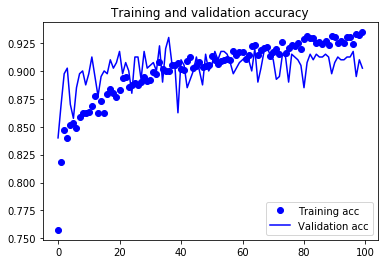

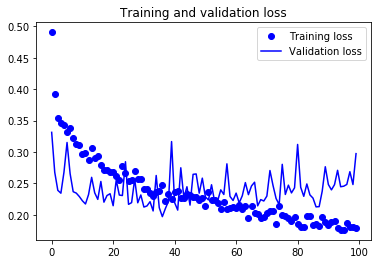

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()